<div style="background-color: black; color: white; padding: 10px;text-align: center;">
  <strong>Date Published:</strong> June 01, 2025 <strong>Author:</strong> Adnan Alaref
</div>

# 🔍 1. What is an Autoencoder?

An **Autoencoder** is a type of **neural network** used to **compress** and then **reconstruct** data.  
It learns to represent the input in a lower-dimensional form (called a latent space), and then tries to recreate the original input from this compressed version.

---

# 🏗️ 2. Autoencoder Architecture

An Autoencoder is made of two main components:

- **Encoder 🔽**  
  Compresses the input into a smaller **latent representation**.

- **Decoder 🔼**  
  Reconstructs the original input from the latent representation.

The entire network is trained to minimize the **reconstruction loss**, usually **Mean Squared Error (MSE)**, between the input and output.

---

# 🤔 3. Why use Autoencoders?

Autoencoders are powerful tools because they:

- Learn **efficient representations** of data  
- Work in **unsupervised settings** (no labels needed)  
- Help in understanding the **structure** of the data  

---

# 🚀 4. Popular Use Cases

- 🧹 **Noise Removal**: Clean noisy images or signals  
- 🔍 **Anomaly Detection**: Detect unusual patterns in data  
- 🧬 **Dimensionality Reduction**: Like PCA, but non-linear  
- 🎨 **Image Generation**: Foundation for Variational Autoencoders (VAEs)

---

# 🎯 5. Goal

The goal of this notebook is to demonstrate how an **Autoencoder** can learn to:
- Compress data into a meaningful **lower-dimensional space**
- Reconstruct the original data as accurately as possible  

---


# **◍ Step 1: Import Libraries.**

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings(action='ignore')
warnings.simplefilter(action='ignore' ,category=FutureWarning)

# **◍ Step 2: Download And Save 5k Sample For Training From Dataset MNIST.**

In [2]:
import os

# Path of the directory you want to create
dir_path = '/kaggle/working/Datasets'

# Create the directory (including intermediate directories if needed)
os.makedirs(dir_path, exist_ok=True)

print(f"Directory created at {dir_path}")

Directory created at /kaggle/working/Datasets


In [3]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import fetch_openml

# Load the MNIST dataset (images of handwritten digits)
mnist = fetch_openml('mnist_784')

# Convert the feature data and target labels to NumPy arrays
X ,y = mnist['data'].to_numpy() ,mnist['target'].to_numpy()

# Randomly select 5000 samples from the dataset (with replacement)
random_indecies = np.random.choice(X.shape[0] ,5000 ,replace = True)

# Subset the data and labels using the random indices
X = X[random_indecies]
y = y[random_indecies]

# Define a function to save the data arrays to .npy files
def save_data_npy(X,y):
  try:
    # Save features and labels to the specified Google Drive path
    np.save(r'/kaggle/working/Datasets/X',X)
    np.save(r'/kaggle/working/Datasets/y',y)
    print("Successfully saving...!")

  except Exception as e:
    # Print an error message if saving fails
    print("Error saving :",e)

# Save data
save_data_npy(X,y)

Successfully saving...!


# **◍ Step 3: AutoEncoder Implemintation.**

#### **AutoEncoder Architecture**
```
Encoder:           Decoder:
784 → 128               32 → 64
      ↓                    ↓
     64                   128
      ↓                    ↓
     32   ← bottleneck  →  32
```


Loaded successfully with allow_pickle=True:
Mean Squared Error on test data: 0.02


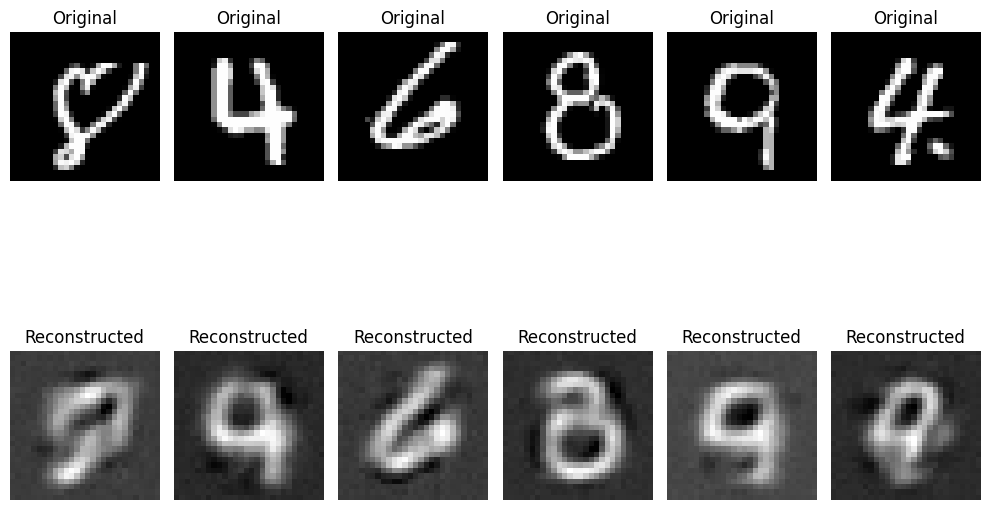

In [4]:
# Define a function to load previously saved data arrays
def load_data():
  try:
    # Load the features and labels from .npy files
    X = np.load(r'/kaggle/working/Datasets/X.npy',allow_pickle=True)
    y = np.load(r'/kaggle/working/Datasets/y.npy',allow_pickle=True)
    print("Loaded successfully with allow_pickle=True:")

    # Normalize pixel values to range [0, 1]
    X = X / 255.0
    return X ,y

  except Exception as e:
    # Print error message if loading fails
    print("Unexpected error:", e)


# Load the dataset
data = load_data()
if data:
  X ,y = data
else :
  raise RuntimeError("Failed to load data.")


# Split the dataset into training and testing sets (80% train, 20% test)
X_train ,X_test = train_test_split(X ,test_size=0.2 ,random_state=42)


# Define and train an autoencoder using a Multi-layer Perceptron (MLP)
autoencoder = MLPRegressor(
    # Input (784) → Hidden (128) → Hidden (64) → Latent (32) → Hidden (64) → Hidden (128) → Output (784)
    hidden_layer_sizes=(128,64,32,64,128),  # encoder → bottleneck → decoder
    activation='relu',
    solver='adam',
    max_iter=5000,
    random_state=42)
autoencoder.fit(X_train, X_train)  # Target is the input itself (unsupervised)


# Reconstruct test images using the trained autoencoder
X_test_reconstructed = autoencoder.predict(X_test)

mse = mean_squared_error(X_test ,X_test_reconstructed)
print(f"Mean Squared Error on test data: {mse:.2f}")


# Visualize original and reconstructed images
n = 6 # Number of images to display
plt.figure(figsize = (10,8))
for i in range(n):
  # Original image
  ax = plt.subplot(2, n, i+1)  # 1 rows, 5 cols, position i+1
  plt.imshow(X_test[i].reshape(28,28),cmap='gray')
  ax.set_title("Original")
  ax.axis('off')

  # Reconstructed image
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(X_test_reconstructed[i].reshape(28,28),cmap='gray')
  ax.set_title("Reconstructed")
  ax.axis('off')

plt.tight_layout()
plt.show()

# 🧠 Final Thoughts

In this notebook, we successfully built and evaluated a basic Autoencoder model to compress and reconstruct image data — all using **unsupervised learning** 🔄. This demonstrates how machines can learn meaningful patterns and structures without labels.

### 🚀 What We Achieved:
- Learned the **core concepts** behind Autoencoders.
- Implemented a working pipeline using **MNIST digits**.
- Trained a simple MLP-based Autoencoder to **reconstruct input images**.
- Measured reconstruction quality using **Mean Squared Error**.
- Visualized the difference between **original and generated images** 🔍.

Autoencoders lay the foundation for many advanced architectures like **Variational Autoencoders (VAEs)** and **Generative Adversarial Networks (GANs)**. They are essential tools in:
- ✅ Feature extraction
- ✅ Denoising
- ✅ Compression
- ✅ Anomaly detection

---


<a id="Import"></a>
<p style="background-color: #000000; font-family: 'Verdana', sans-serif; color: #FFFFFF; font-size: 160%; text-align: center; border-radius: 25px; padding: 12px 20px; margin-top: 20px; border: 2px solid transparent; background-image: linear-gradient(black, black), linear-gradient(45deg, #FF00FF, #00FFFF, #FFFF00, #FF4500); background-origin: border-box; background-clip: content-box, border-box; box-shadow: 0px 4px 20px rgba(255, 105, 180, 0.8);">
   Thanks & Upvote ❤️</p>